# Supervised Learning Project, Anis Uddin M Shueyb, March B-Grp 6

**Context**: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Data Discription**: The file Bank_Personal_Loan_Modelling.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Objective**: The classification goal is to predict the likelihood of a liability customer buying personal loans.

<h3>Exploratory Data Analysis

In [19]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from scipy import stats
from sklearn import metrics

In [2]:
#Reading the dataset 
Data  = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [340]:
#Checking first 5 rows 
Data.head() 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [341]:
#NOTE: Headers of some of the coloumns have been changed (in the .csv itself) to remove space between seperated words. 
#For example Personal Loans is changed to PersonalLoan. This was done to avoid syntax errors due to space.
#Viewing column headers.
Data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

**Attribute Information:**
- **ID**: Customer ID
- **Age**: Customer's age in completed years
- **Experience**: no years of professional experience
- **Income** : Annual income of the customer (000 Dollars)
- **ZIP Code**: Home Address ZIP code
- **Family**: Family size of the customer
- **CCAvg**: Avg. spending on credit cards per month (000 Dollars)
- **Education**: Education Level. 1.Undergrad2.Graduate3.Advanced/Professional
- **Mortgage**: Value of house mortgage if any. (000 Dollars)
- **Personal Loan**: Did this customer accept the personal loan offered in thelast campaign?
- **Securities Account**: Does the customerhave a securities account withthe bank?
- **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
- **Online**: Does the customer use internet banking facilities?
- **Credit card**: Does the customer use a credit card issued by UniversalBank?

In [342]:
#Checking the shape of the dataset 
Data.shape

(5000, 14)

There are **5000 rows and 14 coloums** in this dataset. We should keep in mind that features such ID and ZIP Code are nominal and should not interfere in our analysis.  

In [343]:
#Checking for null values
Data.isnull().any()

ID                   False
Age                  False
Experience           False
Income               False
ZIPCode              False
Family               False
CCAvg                False
Education            False
Mortgage             False
PersonalLoan         False
SecuritiesAccount    False
CDAccount            False
Online               False
CreditCard           False
dtype: bool

There are **no null** values in the dataset.

In [344]:
Data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [345]:
#Viewing 5-point summary.
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


There seems to be **negative min value for experience**, which should be looked into. Also, many categorical features are being treated as numerical one, which needs to be addressed. Let's look into the data types of each feature.

In [346]:
#Checking number of negative values in Experience attribute
Data[Data['Experience'] < 0]['Experience'].count()

52

*Cleaning Negative Values*:

In [3]:
#Defining postive and negative experience
posExp = Data.loc[Data['Experience'] >0]
negExp = Data.Experience < 0
#Making a list containing the ID's corresponding to the negative experience
newlist = Data.loc[negExp]['ID'].tolist() 

In [4]:
#We can run a for loop to go through the ID's and check against the respective age and education to create a list of filtered 
#values and then replace the old values with the median of the filtered values.

for id in newlist:
    age = Data.loc[np.where(Data['ID']==id)]["Age"].tolist()[0]
    education = Data.loc[np.where(Data['ID']==id)]["Education"].tolist()[0]
    filteredExp = posExp[(posExp.Age == age) & (posExp.Education == education)]
    exp = filteredExp['Experience'].median()
    Data.loc[Data.loc[np.where(Data['ID']==id)].index, 'Experience'] = exp

In [5]:
#Checking if negative values have been eliminated.
Data[Data['Experience'] < 0]['Experience'].count()

0

In [350]:
#Viewing the 5 point summary again.
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [351]:
#Checking null counts and data types of each attribute.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         4971 non-null   float64
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


Most attributes are integers whereas Experience and CCAvg are floats. 

In [352]:
Data.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.013188
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
PersonalLoan          2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

We can Ignore Zip Code correlation here. It can be observed from the numerical attributes that Income, CCAvg, Mortgage are positively skewed. 

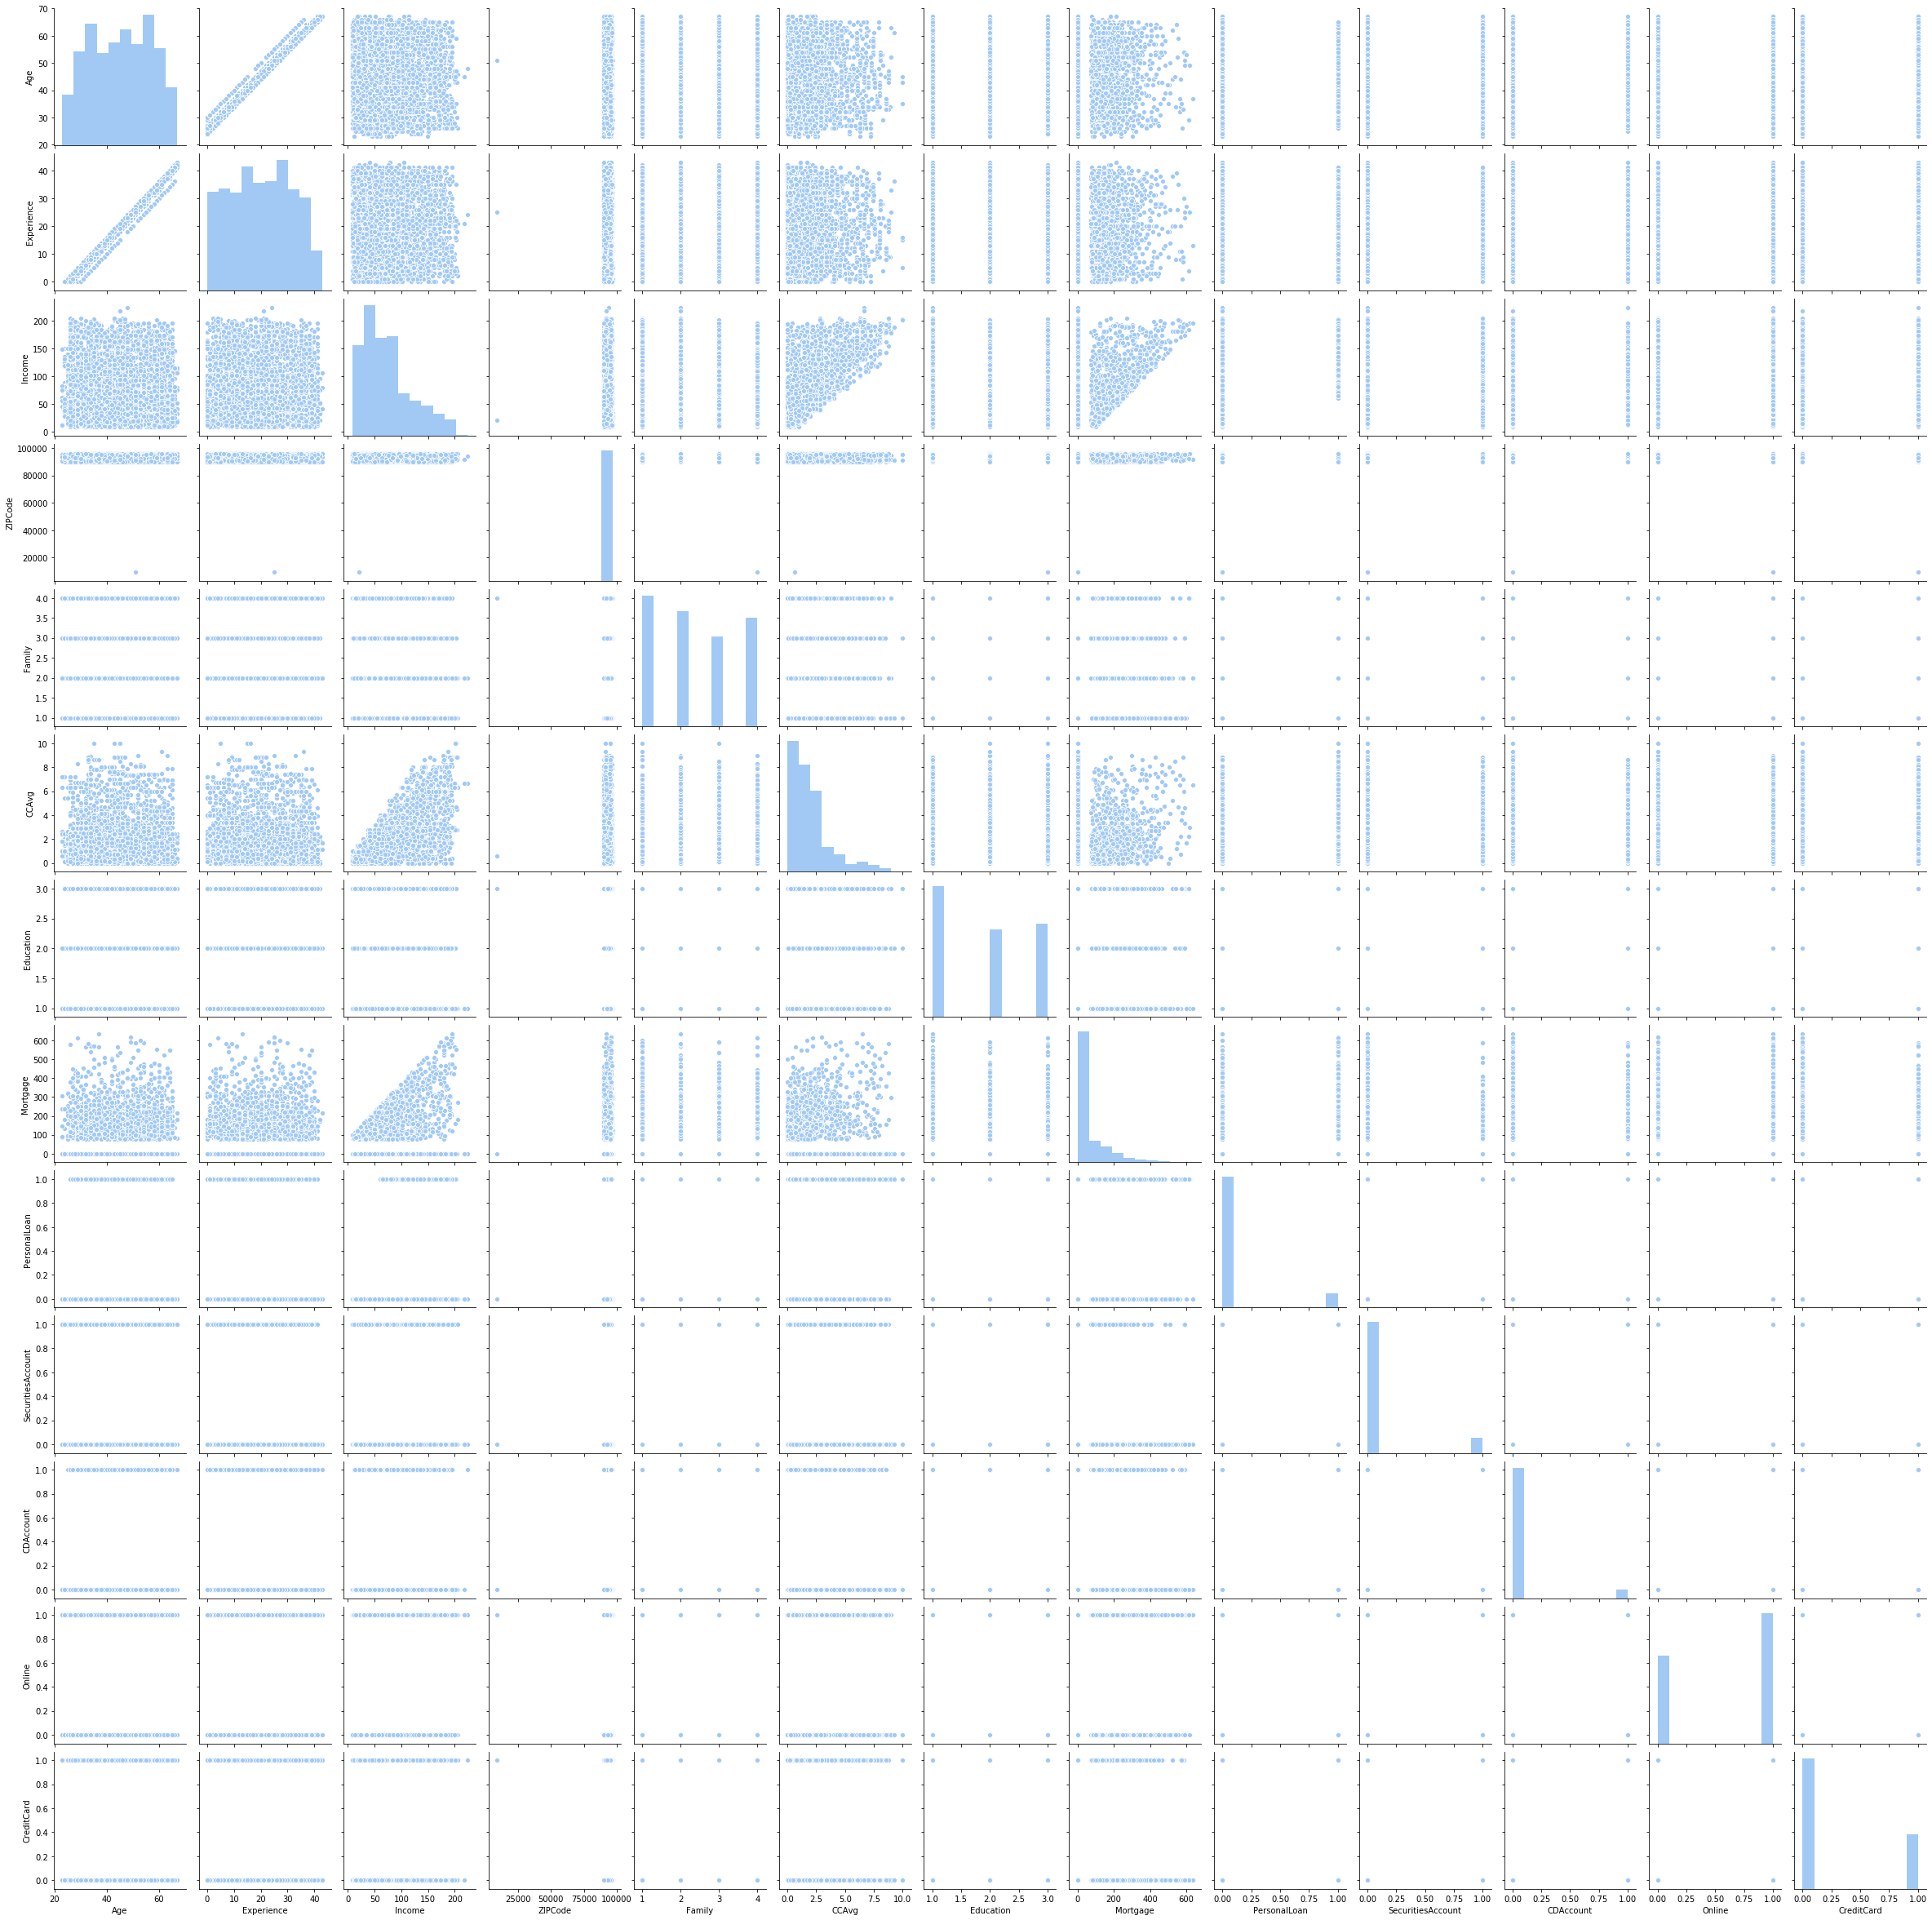

In [353]:
#Plotting pairplot to get an overview ideal of the spread. Note that ID has been omitted.
sns.pairplot(Data.iloc[:,1:])

<h3>Exploring Numerical Attributes

In [354]:
#We can make a simple function where we group Density Distribution, Violinplot, Boxplot and Cumalative Density Distribution.
#Input would be the numerical attribute under observation.
def summary(x):

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(221)
    ax1 = sns.distplot(Data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')

    plt.subplot(222)
    ax2 = sns.violinplot(x = Data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(223)
    ax2 = sns.boxplot(x= Data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(224)
    ax3 = sns.kdeplot(Data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

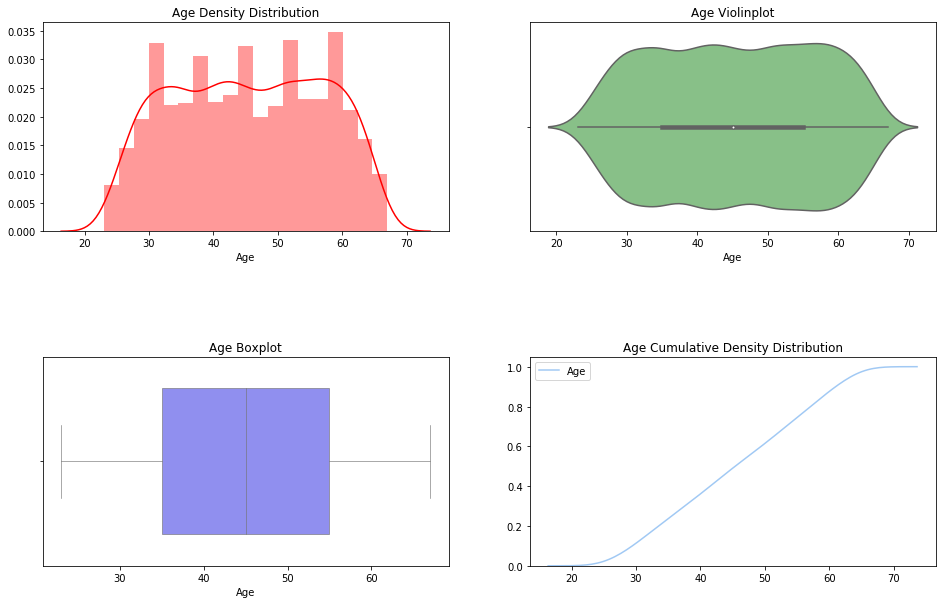

In [355]:
summary('Age')

Age looks to be normally distributed where majority of individuals are between 30-60 range. Also, we can see that the mean and medium are almost the same if not exactly the same. There are no outliers as expected.

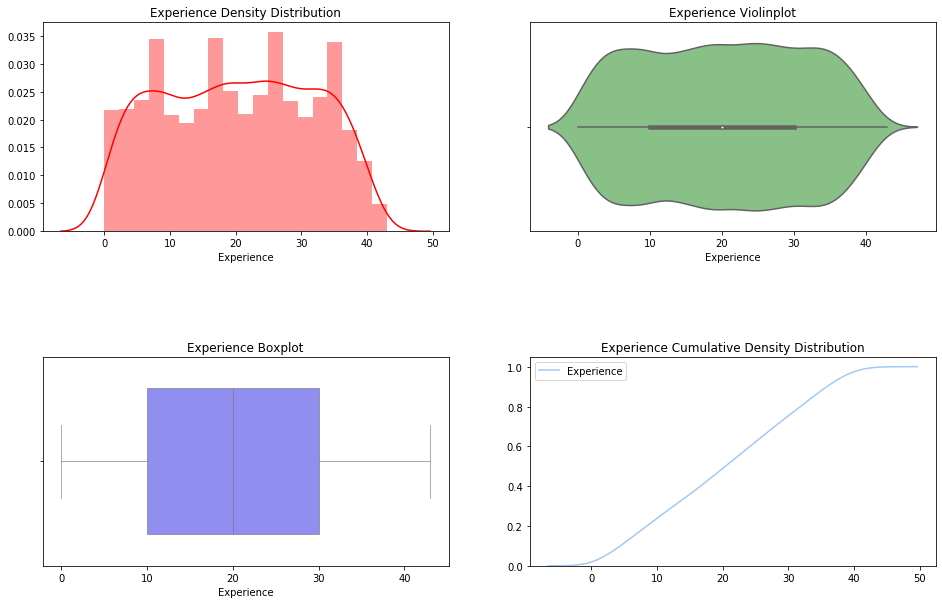

In [356]:
summary('Experience')

Experience is also almost normally distributed (data is slightly denser on the left half). The mean and median are very close. Also, there are no outliers as expected (Although there were negative values that were previously cleaned). 

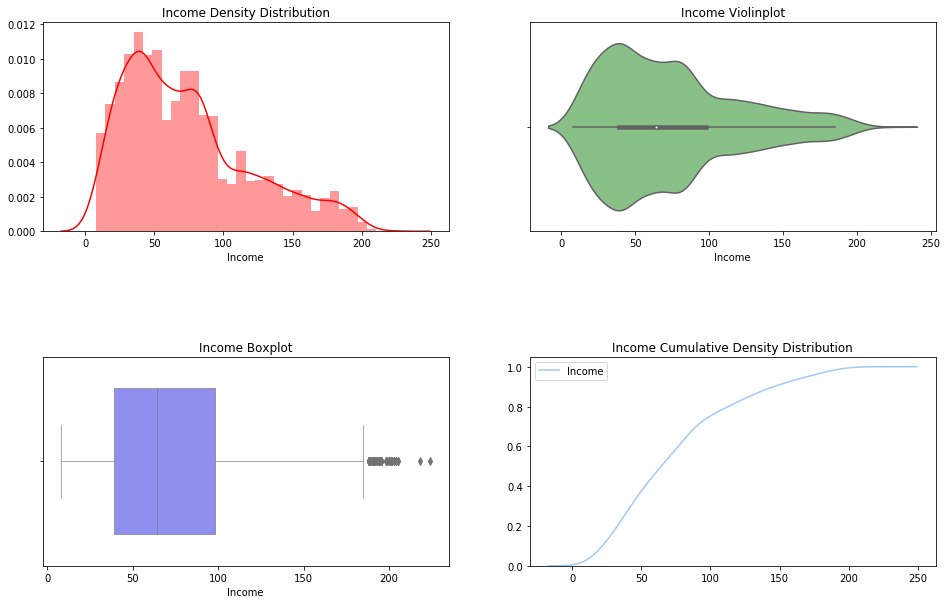

In [357]:
summary('Income')

We can clearly observe that the majority of the income is between 40,000 - 60,000 range. Less and less people earning higher incomes. The mean is larger than the median. There are also large number of outliers beyond the upper whisker. 

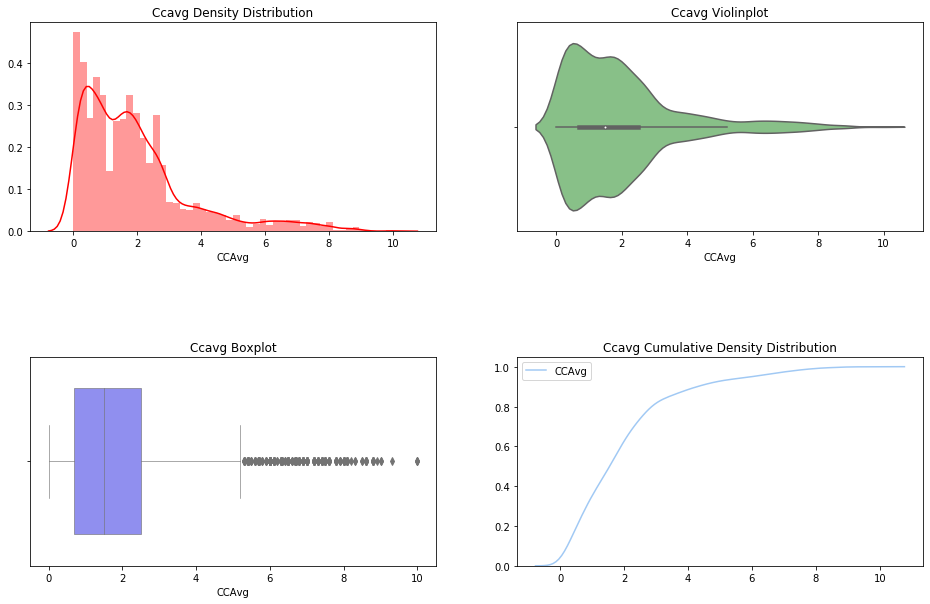

In [358]:
summary('CCAvg')

Majority of the credit card spending is below 2,000. However, there is a large tail on the violin plot which translate to the large number of outliers as well. It could be interesting to look into the relation of credit card spending and personal loan to understand the relationship between the two.

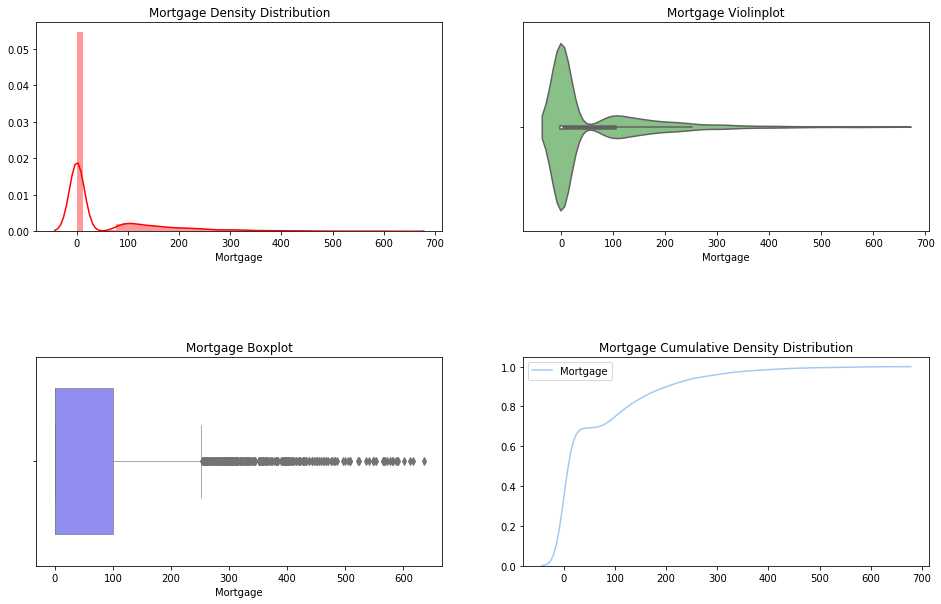

In [359]:
summary('Mortgage')

The Mortgage attribute is heavily skewed to the positive. Almost 70% mortgage is below 50,000 where as the maximum value is somewhere around 650,000. This could be due to many customers having 0 mortage. There are huge number of outliers. 

<h3>Exploring Categorical Attributes

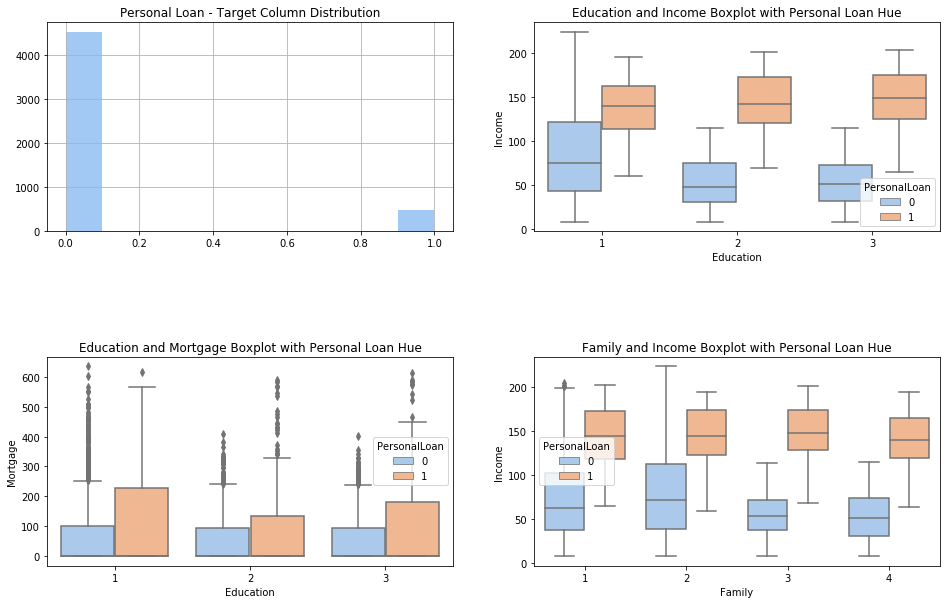

In [360]:
#Using subplots to make grids 
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

# Target Column Distribution
plt.subplot(221)
Data['PersonalLoan'].hist(bins=10)
plt.title(f'Personal Loan - Target Column Distribution')

plt.subplot(222)
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=Data)
plt.title(f'Education and Income Boxplot with Personal Loan Hue')

plt.subplot(223)
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=Data)
plt.title(f'Education and Mortgage Boxplot with Personal Loan Hue')

plt.subplot(224)
sns.boxplot(x="Family",y="Income",hue="PersonalLoan",data=Data)
plt.title(f'Family and Income Boxplot with Personal Loan Hue')

plt.show()

Majority of the customers have no personal loan from the previous campaign.<br><br>
Customers with Education level 1 are having larger income. However, those with personal loans have almost same income across all education levels.<br><br>
There are large number of outliers across all level of education in the Education and Mortgage Boxplot.<br><br>
We can see that families with higher income (higher than approx 120,000) take more personal loans. 

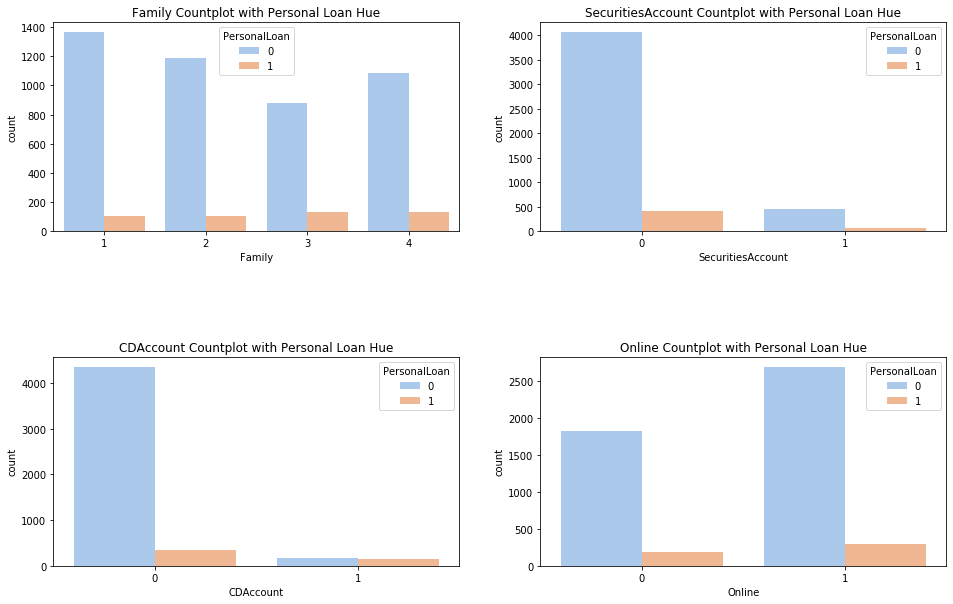

In [361]:
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
sns.countplot(x='Family',data=Data,hue='PersonalLoan')
plt.title(f'Family Countplot with Personal Loan Hue')

plt.subplot(222)
sns.countplot(x="SecuritiesAccount", data=Data,hue="PersonalLoan")
plt.title(f'SecuritiesAccount Countplot with Personal Loan Hue')

plt.subplot(223)
sns.countplot(x='CDAccount',data=Data,hue='PersonalLoan')
plt.title(f'CDAccount Countplot with Personal Loan Hue')

plt.subplot(224)
sns.countplot(x='Online',data=Data,hue='PersonalLoan')
plt.title(f'Online Countplot with Personal Loan Hue')

plt.show()

There is no real effect of family size on personal loans.<br><br>
Majority of customers who dont take personal loan also don't have securities account.<br><br>
Similarly, Majority of customer who take have CD Account also dont have personal loan. However, those with CD Account have an almost even distribution between personal loan.<br><br>
Customers with personal loans have less counts whether or not online banking is used or not. 


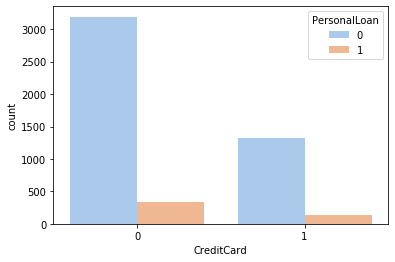

In [362]:
sns.countplot(x='CreditCard',data=Data,hue='PersonalLoan')

Customers with personal loan have a much lower count in both.

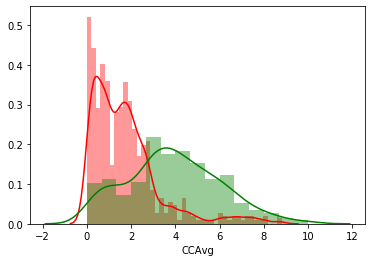

In [363]:
#Plotting distributions of credit card average expense along with personal loan status
sns.distplot( Data[Data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( Data[Data.PersonalLoan == 1]['CCAvg'], color = 'g')

In [364]:
#Checking credit card spending of Loan and Non-Loan customers 
print('Credit card spending of Non-Loan customers: ', Data[Data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', Data[Data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Customers with higher credit card spending (around 3,800) are more likely to avail personal loans as compared to customers with lower credit card spending (around 1,400). 

In [365]:
Data.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


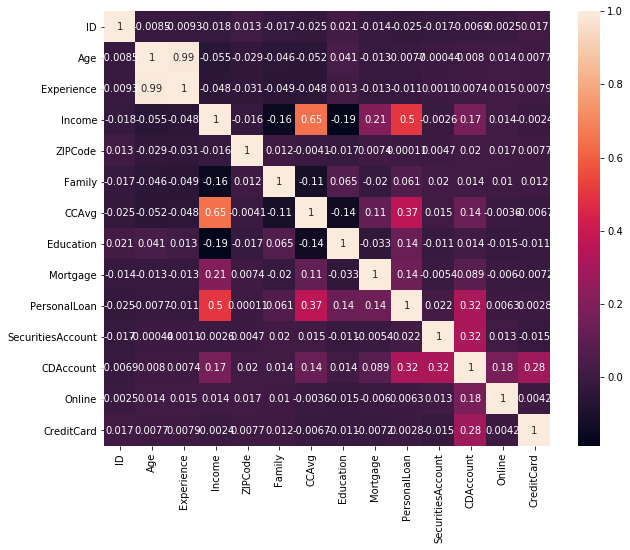

In [366]:
cor = Data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(cor, annot=True)

Income and CCAvg are correlated slightly towards the higher side.<br><br>
Experience and Age is highly correlevated.<br><br>

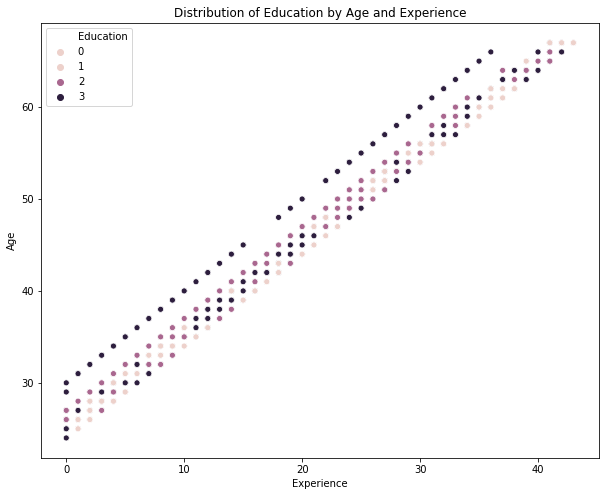

In [367]:
#Plotting a scatter plot to observe Age and Experience relationship.
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Experience", y = "Age",data =Data, hue = "Education")
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Distribution of Education by Age and Experience")
plt.show()

Experience and Age have a very strong positive correlation. We can observe that most people are in level 1 education.

<h1>Applying Classification Models

In this section we will apply 3 classification models to to predict the likelihood of a customer buying personal loans:<br><br>
**1.Logistic**<br>**2.Naïve Bayes**<br>**3.K-NN**

<h3>Preparing and splitting the data

In [6]:
#Firstly, we'll drop the irrelevant columns from 'Data' and name the new dataframe as 'data'.
data=Data.drop(['ID','ZIPCode','Experience'], axis =1 )
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [369]:
#Viewing columns and Dtype.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Income             5000 non-null   int64  
 2   Family             5000 non-null   int64  
 3   CCAvg              5000 non-null   float64
 4   Education          5000 non-null   int64  
 5   Mortgage           5000 non-null   int64  
 6   PersonalLoan       5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [7]:
X = data.drop(labels= "PersonalLoan" , axis = 1) # Predictor feature columns
y = data["PersonalLoan"] # Predicted
X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [11]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
1334,47,35,2,1.3,1,0,0,0,1,0
4768,38,39,1,2.0,2,0,0,0,1,0
65,59,131,1,3.8,1,0,0,0,1,1
177,29,65,4,1.8,2,244,0,0,0,0
4489,39,21,3,0.2,2,0,0,0,1,0


In [13]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


<h3>1. Logistic Regression

In [14]:
# Fit the model on train
LR_model = LogisticRegression(solver="liblinear")
LR_model.fit(X_train, y_train)
#predict on test
y_predict = LR_model.predict(X_test)

In [21]:
LR_model_score = LR_model.score(X_test, y_test)
print('Logistic Regression Accuracy:',LR_model_score)

Logistic Regression Accuracy: 0.9426666666666667


In [22]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predict))

Confusion_matrix:
[[1338   13]
 [  73   76]]


<h3>2.Naïve Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [24]:
GNB_model = GaussianNB()

GNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_predict = GNB_model.predict(X_test)

In [26]:
GNB_Acc=accuracy_score(y_test, y_predict, normalize = True) 
print('Naïve Bayes Accuracy:',GNB_Acc)

Naïve Bayes Accuracy: 0.8746666666666667


In [27]:
print(recall_score(y_test, y_predict))

0.5704697986577181


In [28]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predict))

Confusion_matrix:
[[1227  124]
 [  64   85]]


<h3>3.K-NN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [30]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [31]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [32]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [33]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [34]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = KNN.predict(X_test)
KNN_Acc= KNN.score(X_test, y_test)
print('KNN Accuracy:',KNN_Acc)

KNN Accuracy: 0.9586666666666667


In [35]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))

Confusion_matrix:
[[1346    5]
 [  57   92]]


<h3>Comparision of Accuracy scores of the models used.

In [36]:
print('Logistic Regression Accuracy:',LR_model_score)
print('Naïve Bayes Accuracy:',GNB_Acc)
print('KNN Accuracy:',KNN_Acc)

Logistic Regression Accuracy: 0.9426666666666667
Naïve Bayes Accuracy: 0.8746666666666667
KNN Accuracy: 0.9586666666666667


The objective was to predict the likelihood of customer taking personal loan.<br><br>

From the accuracy scores , KNN algorithm has the highest accuracy and stability.<br><br>

Therefore it is the best model in this case to predict the likelihood of a customer accepting personal loan.<br>
